# **BLACK FRIDAY ANALYSIS**

### **IMPORTING LIBRARIES**

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
%matplotlib inline

### **LOADING DATA**

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\black friday\\black friday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### **HANDLING AND CLEANING OF DATA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df['Gender'] = df['Gender'].replace("F",'Female')
df['Gender'] = df['Gender'].replace("M",'Male')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,Female,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,Female,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,Female,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,Male,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,Female,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,Female,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,Female,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,Male,55+,16,C,4+,0,8,0.0,0.0,7969


In [8]:
df.duplicated().sum()

np.int64(0)

### **DATA VISULAZATION**

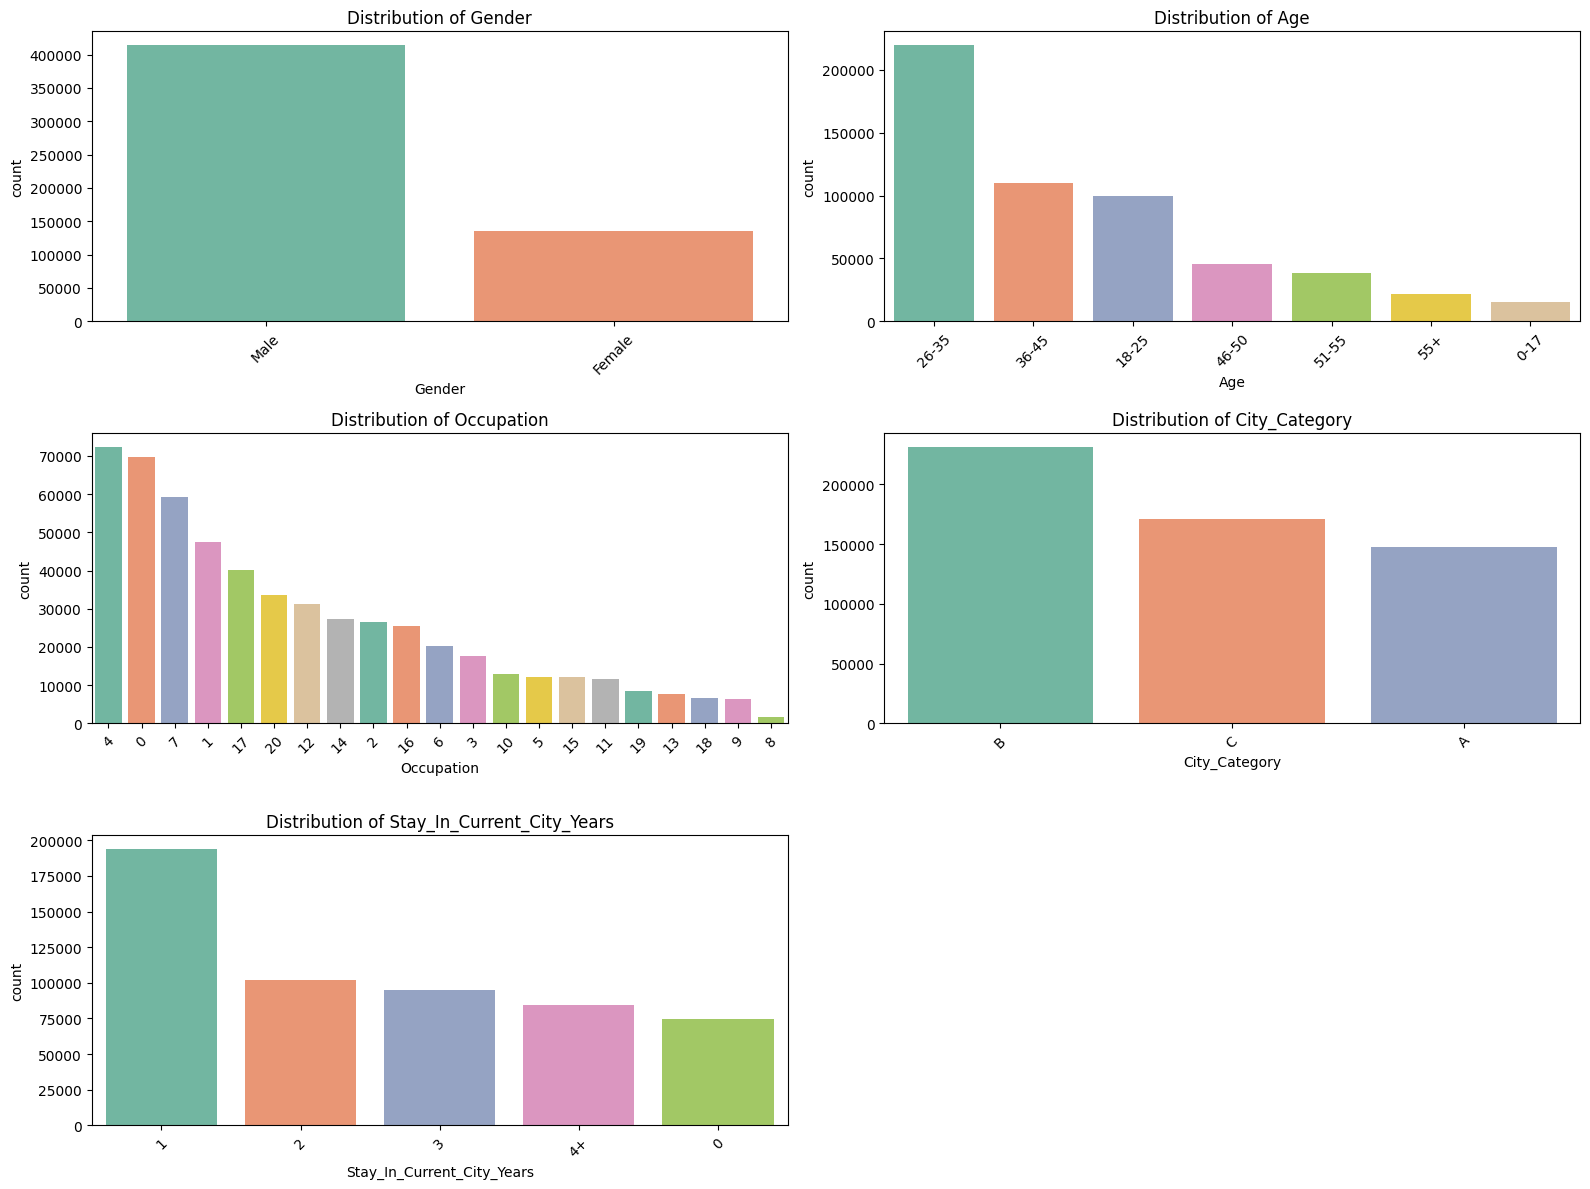

In [19]:

categorical_features = ['Gender','Age', 'Occupation','City_Category','Stay_In_Current_City_Years']

plt.figure(figsize =(16,12))
for i , col in enumerate(categorical_features,1):
    plt.subplot(3,2,i)
    sns.countplot(data = df , x = col, order = df[col].value_counts().index, palette = "Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation= 45)

plt.tight_layout()
plt.show()



#Most buyers are in the 26–35 age group, with a slightly higher number of male customers, and a significant share comes from City Category B.

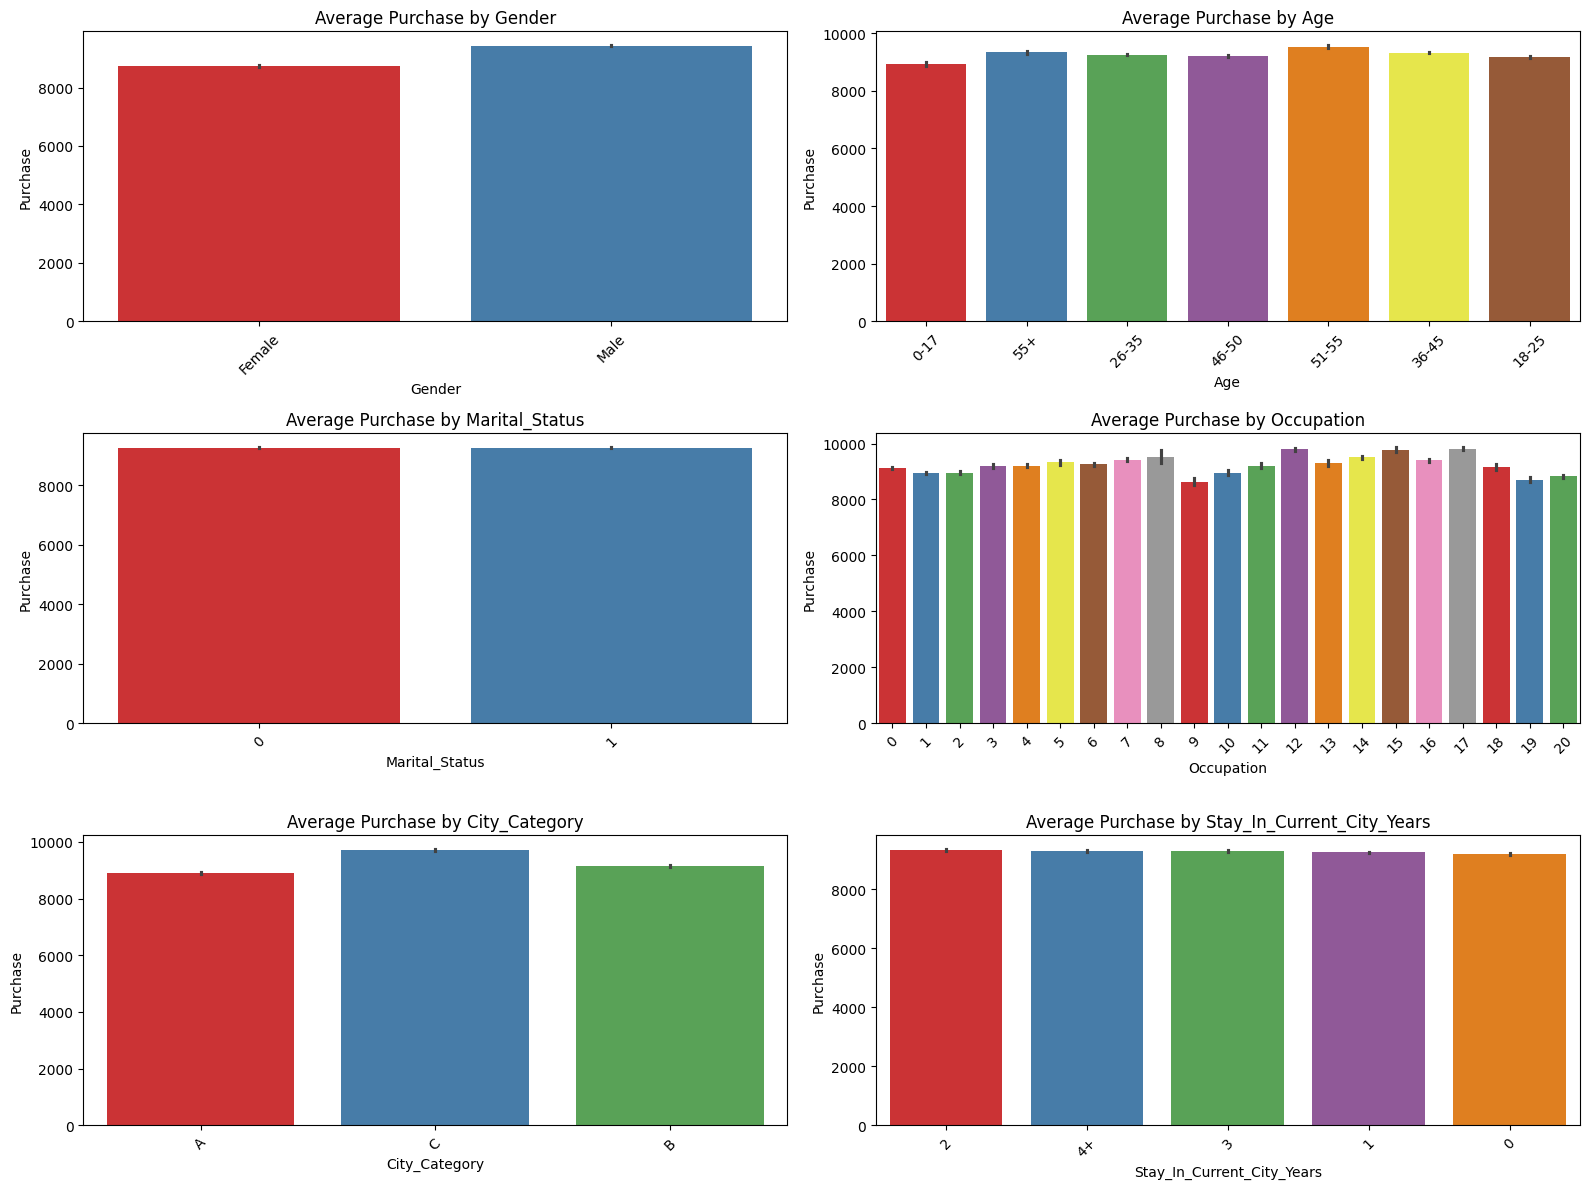

In [24]:
bivariate_features = ['Gender', 'Age', 'Marital_Status', 
                      'Occupation', 'City_Category', 'Stay_In_Current_City_Years']

plt.figure(figsize=(16, 12))
for i, col in enumerate(bivariate_features , 1):
    plt.subplot(3,2,i)
    sns.barplot(data = df, x = col, y= 'Purchase', estimator = 'mean',palette ="Set1")
    plt.title(f"Average Purchase by {col}")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

#Average purchase is highest for customers aged 51–55, with males spending slightly more than females. City Category C leads in spending, while occupation types like 15, 12, 8, and 17 also show higher averages. Marital status and years of stay in the city have minimal impact on spending.

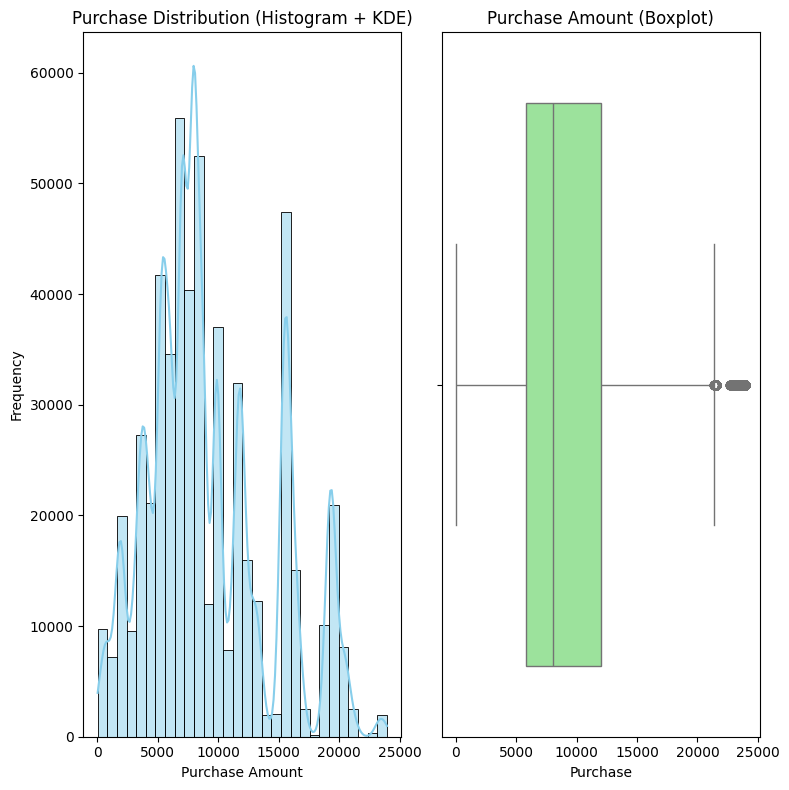

In [29]:
plt.figure(figsize =(8,8))

plt.subplot(1,2,1)
sns.histplot(df['Purchase'], bins = 30, kde = True, color = "skyblue")
plt.title("Purchase Distribution (Histogram + KDE)")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
sns.boxplot(x = df['Purchase'], color= 'lightgreen')
plt.title("Purchase Amount (Boxplot)")

plt.tight_layout()
plt.show()

#The purchase amount distribution is right-skewed, with most transactions clustered between ₹5,000–₹15,000, and some high-value outliers pushing the maximum range.

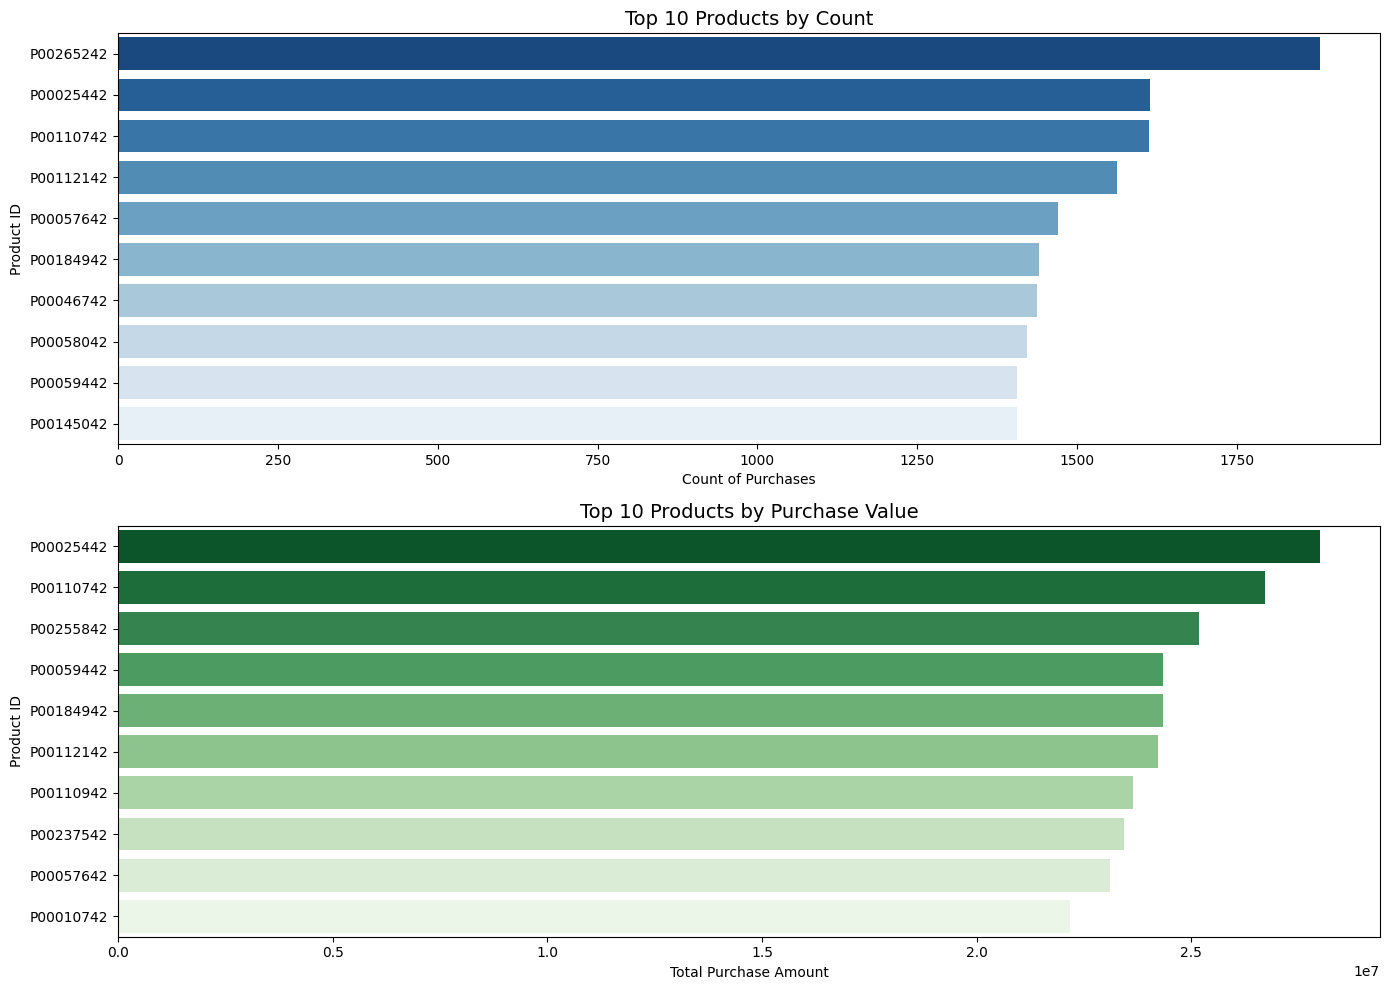

In [33]:
# 1. Top 10 products by count
top_products_count = df['Product_ID'].value_counts().head(10)

# 2. Top 10 products by total purchase amount
top_products_value = df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(14,10))

# Barplot 1 → by count
plt.subplot(2,1,1)
sns.barplot(x=top_products_count.values, y=top_products_count.index, palette="Blues_r")
plt.title("Top 10 Products by Count", fontsize=14)
plt.xlabel("Count of Purchases")
plt.ylabel("Product ID")

# Barplot 2 → by purchase value
plt.subplot(2,1,2)
sns.barplot(x=top_products_value.values, y=top_products_value.index, palette="Greens_r")
plt.title("Top 10 Products by Purchase Value", fontsize=14)
plt.xlabel("Total Purchase Amount")
plt.ylabel("Product ID")

plt.tight_layout()
plt.show()


#Certain products are frequently bought but low-value, while others contribute higher revenue despite fewer sales, showing a clear difference between volume-driven and value-driven products.

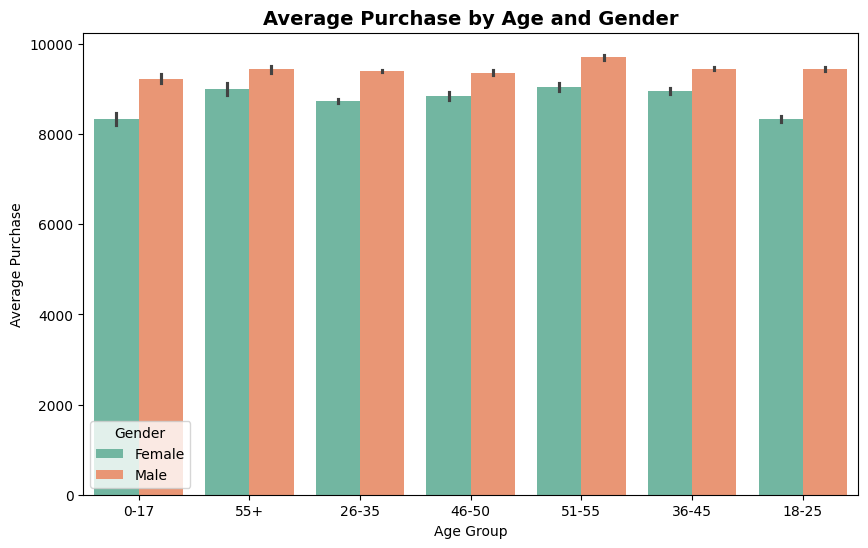

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data = df , x = "Age", y = "Purchase", hue= "Gender", estimator ="mean", palette = "Set2")
plt.title("Average Purchase by Age and Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase")
plt.legend(title="Gender")
plt.show()

#Across all age groups, males spend slightly more than females, with the 51-55 male group being the highest average spender.

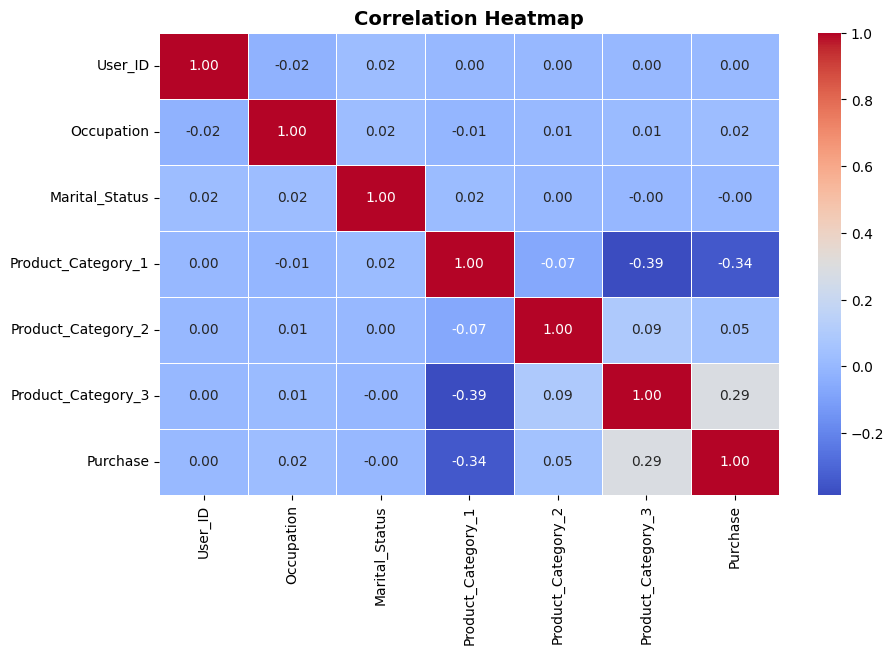

In [36]:
numeric_df = df.select_dtypes(include= ['int64','float64'])
corr = numeric_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

## **OBSERVATION AND SUGGESTIONS**

#The analysis highlights that young working-age customers (26–35), especially males in City Category B, are the biggest contributors to Black Friday sales. While product sales vary, a few items drive revenue disproportionately.
Suggestion: For marketing and recommendation systems, focus on personalized promotions for 26–35 male customers and highlight high-value products that bring more revenue even if purchased less frequently.